# United Nations Millennium Development Goals

Driven Data project https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/

A simple ARIMA approach to predict time series data.

RMSE: 0.0586
(120th place in ranking in Feb 2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pyramid.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA


/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/statsmodels-0.10.0rc2+47.g534f51312-py3.6-macosx-10.7-x86_64.egg/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('TrainingSet.csv')

In [3]:
df.head()

,Unnamed: 0,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [4]:
df.shape

(195402, 40)

In [5]:
sub = pd.read_csv('SubmissionRows.csv')

In [6]:
sub.head()

,Unnamed: 0,2008 [YR2008],2012 [YR2012]
0,559,NaN,NaN
1,618,NaN,NaN
2,753,NaN,NaN
3,1030,NaN,NaN
4,1896,NaN,NaN


In [7]:
sub.shape

(737, 3)

In [8]:
# I will only model time series for rows required in submission
df = df.set_index('Unnamed: 0').join(sub.set_index('Unnamed: 0'), how='inner')

In [9]:
df.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name,2008 [YR2008],2012 [YR2012]
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.325000,0.360000,0.395000,0.430000,0.4650,Afghanistan,7.8,Ensure environmental sustainability,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000879,0.001058,0.012241,0.021071,0.0190,Afghanistan,8.16,Develop a global partnership for development: ...,NaN,NaN
753,0.296,0.2909,0.2852,0.2798,0.2742,0.2683,0.2624,0.2565,0.2503,0.2439,...,0.124400,0.121000,0.117700,0.114500,0.1115,Afghanistan,4.1,Reduce child mortality,NaN,NaN
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001000,0.001000,0.001000,0.001000,0.0010,Afghanistan,6.1,Combat HIV/AIDS,NaN,NaN
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.963000,0.963000,0.962000,0.962000,0.9610,Albania,7.8,Ensure environmental sustainability,NaN,NaN


In [10]:
df.shape

(737, 41)

In [11]:
df.drop(['Series Code', 'Series Name', 'Country Name'], axis=1, inplace=True)

In [12]:
df.drop(['2008 [YR2008]', 
        '2012 [YR2012]'], axis=1, inplace=True)

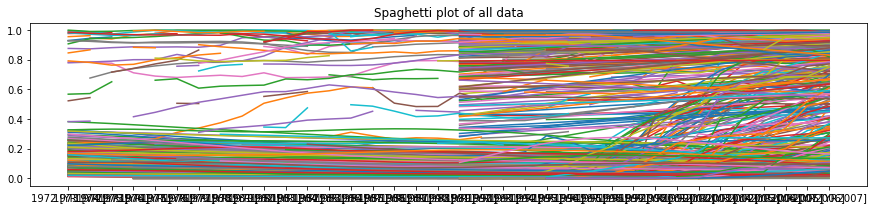

In [13]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(df.T)
ax.set_title('Spaghetti plot of all data');

In [14]:
df = df.T

In [15]:
df.head()

Unnamed: 0,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
1972 [YR1972],NaN,NaN,0.2960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.1700,NaN,NaN,NaN,0.1087,NaN
1973 [YR1973],NaN,NaN,0.2909,NaN,NaN,NaN,NaN,0.676752,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1651,NaN,NaN,NaN,0.1083,NaN
1974 [YR1974],NaN,NaN,0.2852,NaN,NaN,NaN,NaN,0.717112,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1610,NaN,NaN,NaN,0.1081,NaN
1975 [YR1975],NaN,NaN,0.2798,NaN,NaN,NaN,NaN,0.740751,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1579,NaN,NaN,NaN,0.1081,NaN
1976 [YR1976],NaN,NaN,0.2742,NaN,NaN,NaN,NaN,0.758748,NaN,NaN,...,NaN,0.811311,NaN,NaN,0.1562,NaN,NaN,NaN,0.1080,NaN


In [16]:
# create separate dataframe as a placeholder for predictions
sub2 = sub.copy()
sub2 = sub2.set_index('Unnamed: 0')
sub2 = sub2.T
sub2

Unnamed: 0,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2008 [YR2008],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012 [YR2012],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.columns

Int64Index([   559,    618,    753,   1030,   1896,   1955,   2090,   2690,
              3233,   3292,
            ...
            283137, 283460, 284003, 284062, 284197, 284474, 285340, 285399,
            285534, 285811],
           dtype='int64', name='Unnamed: 0', length=737)

In [18]:
df[559].values

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan, 0.048, 0.049, 0.049, 0.049, 0.049, 0.084, 0.118, 0.152,
       0.187, 0.221, 0.256, 0.291, 0.325, 0.36 , 0.395, 0.43 , 0.465])

In [19]:
df.index = pd.to_datetime(df.index.str.split(' ').str[0])

In [20]:
# change index frequency
df = df.resample('Y').mean()

In [21]:
# auto fit ARIMA to each of data series, create dict with arima orders count
orders_dict = {}
for col in df.columns:
    first_idx = df[col].first_valid_index()
    df_arima = df[col].loc[first_idx:]
    df_arima.loc[~np.isfinite(df_arima)] = df_arima.median()
    if sum([ np.round(x, 3) == np.round(df_arima.mean(), 3) for x in df_arima.values]) == len(df_arima[~df_arima.isna()]):
        sub2[col]['2008 [YR2008]'] = round(df_arima.mean(),3)
        sub2[col]['2012 [YR2012]'] = round(df_arima.mean(),3)
    else:
        order = auto_arima(df_arima,
                           m=1,
            error_action='ignore',  
            suppress_warnings=True, 
            stepwise=True)
    if order.order in orders_dict.keys():
        orders_dict[order.order] += 1
    else:
        orders_dict[order.order] = 1

In [22]:
orders_dict

{(0, 0, 0): 23,
 (0, 0, 1): 4,
 (0, 0, 2): 2,
 (0, 1, 0): 164,
 (0, 1, 1): 28,
 (0, 1, 2): 3,
 (0, 2, 0): 116,
 (0, 2, 1): 64,
 (0, 2, 2): 10,
 (0, 2, 3): 2,
 (0, 2, 4): 1,
 (1, 0, 0): 6,
 (1, 0, 1): 6,
 (1, 0, 2): 1,
 (1, 0, 3): 1,
 (1, 1, 0): 38,
 (1, 1, 1): 6,
 (1, 1, 2): 1,
 (1, 2, 0): 80,
 (1, 2, 1): 4,
 (1, 2, 2): 15,
 (1, 2, 3): 4,
 (2, 0, 0): 1,
 (2, 0, 1): 1,
 (2, 0, 2): 3,
 (2, 1, 0): 12,
 (2, 1, 1): 5,
 (2, 1, 2): 8,
 (2, 1, 3): 3,
 (2, 1, 4): 1,
 (2, 2, 0): 63,
 (2, 2, 1): 9,
 (2, 2, 2): 23,
 (2, 2, 3): 2,
 (3, 0, 0): 2,
 (3, 0, 3): 2,
 (3, 1, 0): 2,
 (3, 1, 2): 2,
 (3, 2, 0): 6,
 (3, 2, 1): 1,
 (3, 2, 2): 2,
 (3, 2, 3): 1,
 (4, 1, 0): 3,
 (4, 1, 2): 1,
 (4, 2, 0): 4,
 (5, 2, 1): 1}

Order (0,1,0) fits the highest number of series, hence I will use it in my forecasting.

In [23]:
for col in df.columns:
    
    # ignore consecutive NaN's at the beginning of series
    first_idx = df[col].first_valid_index() 
    df_arima = df[col].loc[first_idx:]
    
    # replace NaN's in the middle of a series with median value
    df_arima.loc[~np.isfinite(df_arima)] = df_arima.median()
    df_arima.name = str(df_arima.name)
    
    # if the values in series are constant, forecast the same value
    if sum([np.round(x, 3) == np.round(df_arima.mean(), 3) for x in df_arima.values]) == len(df_arima[~df_arima.isna()]):
        sub2[col]['2008 [YR2008]'] = round(df_arima.mean(),3)
        sub2[col]['2012 [YR2012]'] = round(df_arima.mean(),3)
    else:
        model = ARIMA(df_arima,  order=(0,1,0))
        model_fit = model.fit(disp=0, maxiter=500, solver='newton')
        forecast = model_fit.forecast(steps=5)[0]
        sub2[int(col)]['2008 [YR2008]'] = forecast[0]
        sub2[int(col)]['2012 [YR2012]'] = forecast[4]

In [24]:
# prepare final submission file
submission = sub2.T.reset_index()

In [25]:
submission

,Unnamed: 0,2008 [YR2008],2012 [YR2012]
0,559,0.491063,0.595313
1,618,0.020118,0.024588
2,753,0.106229,0.085143
3,1030,0.001000,0.001000
4,1896,0.960769,0.959846
...,...,...,...
732,284474,0.135765,0.142824
733,285340,0.797294,0.798471
734,285399,0.114882,0.140412
735,285534,0.095637,0.094186


In [26]:
submission.set_index('Unnamed: 0', inplace=True)

In [27]:
submission.to_csv('SubmissionRows_25_02_2020_2.csv')

## Explore forecasts visually

In [28]:
import random
import matplotlib
colors = list(matplotlib.colors.cnames.values())[100:120]

In [29]:
df.head()

Unnamed: 0,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
1972-12-31,NaN,NaN,0.2960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.805803,NaN,NaN,0.1700,NaN,NaN,NaN,0.1087,NaN
1973-12-31,NaN,NaN,0.2909,NaN,NaN,NaN,NaN,0.676752,NaN,NaN,...,NaN,0.796397,NaN,NaN,0.1651,NaN,NaN,NaN,0.1083,NaN
1974-12-31,NaN,NaN,0.2852,NaN,NaN,NaN,NaN,0.717112,NaN,NaN,...,NaN,0.796397,NaN,NaN,0.1610,NaN,NaN,NaN,0.1081,NaN
1975-12-31,NaN,NaN,0.2798,NaN,NaN,NaN,NaN,0.740751,NaN,NaN,...,NaN,0.796397,NaN,NaN,0.1579,NaN,NaN,NaN,0.1081,NaN
1976-12-31,NaN,NaN,0.2742,NaN,NaN,NaN,NaN,0.758748,NaN,NaN,...,NaN,0.811311,NaN,NaN,0.1562,NaN,NaN,NaN,0.1080,NaN


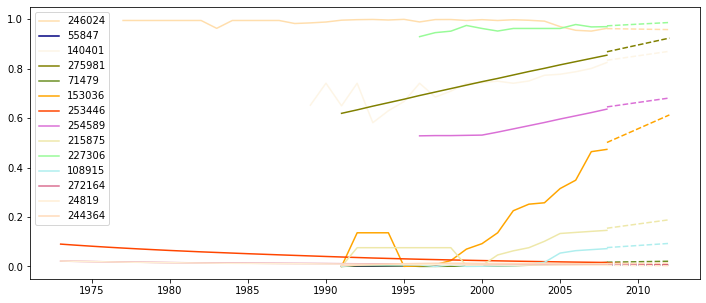

In [30]:
fig, ax = plt.subplots(figsize=(12,5))
y = 0
for i in range(1, 15):
    x = random.choice(df.columns) 
    df_data = df[x]
    df_forcast = sub2[x]
    ax.plot(pd.to_datetime(df_data.index), df_data.values, label=x, color=colors[y])
    ax.plot(pd.to_datetime(df_forcast.index.str.split(' ').str[0]), df_forcast.values, linestyle='--', color=colors[y])
    ax.legend()
    y += 1